## **Problem Statement**

### **Business Context**

In the dynamic landscape of the media and news industry, the ability to swiftly categorize and curate content has become a strategic imperative. The vast volume of information demands efficient systems to organize and present content to the audience.

The media industry, being the pulse of information dissemination, grapples with the continuous influx of news articles spanning diverse topics. Ensuring that the right articles reach the right audience promptly is not just a logistical necessity but a critical component in retaining and engaging audiences in an age of information overload.

Common Industry Challenges:
Amidst the ceaseless flow of news, organizations encounter challenges such as:
- Information Overload: The sheer volume of news articles makes manual categorization impractical.
- Timeliness: Delays in categorizing news articles can result in outdated or misplaced content.

### **Problem Definition**

E-news Express, a news aggregation startup, faces the challenge of categorizing the news articles collected. With news articles covering sports, busie=ness, politics, and more, the need for an advanced and automated system to categorize them has become increasingly evident. The manual efforts required for categorizing such a diverse range of news articles are substantial, and human errors in the categorization of news articles can lead to reputational damage for the startup. There is also the factor of delays and potential inaccuracies. To streamline and optimize this process, the organization recognizes the imperative of adopting cutting-edge technologies, particularly machine learning, to automate and enhance the categorization of content.

As a data scientist on the E-news Express data team, the task is to analyze the text in news articles and build a model for categorizing them. The goal is to optimize the categorization process, ensuring timely and personalized delivery.

### **Data Dictionary**

- **Article**: The main body of the news article
- **Category**: The category the article belongs to

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.

**Note**:
1. Please make sure to use Google Colab for this project.
2. It is recommended to use Colab's free GPU for this project.
    - One can set the Colab runtime to ***T4 GPU*** before starting the project to use the GPU.

## **Installing and Importing Necessary Libraries and Dependencies**

In [ ]:
!pip install torch==2.4.1 torchvision==0.19.1 torchaudio==2.4.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [ ]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu121


In [ ]:
# Installing the libraries with the specified version.
!pip install torch torchvision -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [ ]:
!pip install sentence-transformers
# Install the sentence-transformers library

**NOTE**: If you encounter an error stating 'library not found,' please restart the kernel (do not disconnect the runtime) and try again.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_colwidth', None)

import torch
from sentence_transformers import SentenceTransformer # this should now work
from transformers import T5Tokenizer, T5ForConditionalGeneration, pipeline
from transformers import BitsAndBytesConfig
# To build a Random Forest model
from sklearn.ensemble import RandomForestClassifier
from transformers import BitsAndBytesConfig

# to split the data
from sklearn.model_selection import train_test_split
# to compute performance metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,make_scorer,recall_score,precision_score,f1_score
from sklearn.model_selection import GridSearchCV

# to ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## **Loading the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Complete the code to read the CSV file
data = pd.read_csv("/content/drive/MyDrive/article_data.csv")

## **Data Overview**

In [ ]:
# Write the code to check the first 5 rows of the data
data.head()

,Article,Category
0,"Sudan Govt rejects call to separate religion, state Sudanese rebel leaders #39; demand that Islam be kept out of government in the war-torn region of Darfur, has been rejected by government negotiators.",0
1,Hassan: #39;Abhorrent act #39; says Blair Western political leaders have united to condemn the kidnappers of charity worker Margaret Hassan after a video surfaced apparently showing a militant firing a pistol into the head of a blindfolded woman wearing an orange jumpsuit.,0
2,"Sharon Says Gaza Evacuation Set for 2005 (AP) AP - Israel's evacuation of the Gaza Strip will begin next summer and will take about 12 weeks, Prime Minister Ariel Sharon said Wednesday, reversing an earlier decision to speed up the pullout.",0
3,"Prince Charles chastised for quot;old fashioned quot; views A minister has launched a scathing attack on heir to the throne Prince Charles, accusing him of being quot;very old fashioned quot; and out of touch in his views on teaching in schools.",0
4,"U.S. Says N.Korea Blast Probably Not Nuclear SEOUL (Reuters) - A huge explosion rocked North Korea last week but U.S. and South Korean officials said on Sunday it was unlikely to have been a nuclear weapons test despite the appearance of a ""peculiar cloud"" over the area.",0


In [ ]:
# Write the code to check the shape of the data
data.shape

(4000, 2)

In [ ]:
## Complete the code to check the value counts in the Category column
data["Category"].value_counts()

,count
Category,
0,1000
1,1000
2,1000
3,1000


## **Exploratory Data Analysis (EDA)**


In [ ]:
 # function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Distribution of category

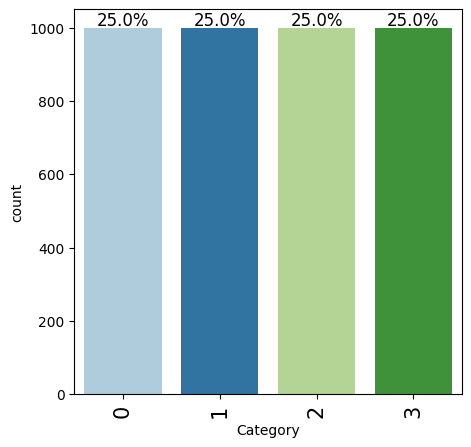

In [ ]:
labeled_barplot(data, "Category", perc=True)   ## Complete the code to get the barplot of Category variable

## **Model Building - Sentence Transformer + ML**

### Defining the SentenceTransformer Model

In [ ]:
## Defining the model
"""
Model will have three components. The first is a Transformer component which process the input text,
converting it into token embedding, the second is a pooling component which averages the token embedding that
creates a single dimensional vector that represents the entire sentence. The last layer is normalization of the
sentence embedding which helps to maintain a consistent scale and makes the embedding more suitable for similarity based tasks.
"""
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
print(model)

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)


In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Encoding the data

In [ ]:
"""
In the encoding process there are four steps, the first is the tokenization where each model is broken down into tokens that
transformer can understand, then tokens can be passed through transformer layers, after transformer layers are pooled to
understand the context and relationship between words, finally the resulting vectors are normalizied to ensure that they are
on a consistent scale.
"""
# setting the compute device
device = "cuda" if torch.cuda.is_available() else "cpu"

## Encoding the dataset, which results in an embedding matrix where each row corresponds to an embedding of an article from your dataset.
embedding_matrix = model.encode(data["Article"],show_progress_bar=True,device=device)

Batches:   0%|          | 0/125 [00:00<?, ?it/s]

### Train-Test Split

In [ ]:
"""
Split the data, where X is the embedding matrix where each row corresponds to the embedding of an article
from the dataset and the Y is the labels or categories associated with the dataset
"""
X = embedding_matrix
y = data["Category"]

In [ ]:
"""
All of the data is split into three sets, training, validation and test.
"""
# Initial split into training (80%) and testing (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42)

# Further split the temporary set into validation (10%) and test (10%) sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

In [ ]:
"""
Ideally we want in Machine Learning at least 10 samples for every feature to ensure robust model training.
"""
print("Shape of the set of input variables for training:", X_train.shape)    # Complete the code to get the shape of training input data
print("Shape of the set of input variables for validation:", X_valid.shape)    # Complete the code to get the shape of validation input data
print("Shape of the set of input variables for testing:", X_test.shape)     # Complete the code to get the shape of testing input data

Shape of the set of input variables for training: (3200, 384)
Shape of the set of input variables for validation: (400, 384)
Shape of the set of input variables for testing: (400, 384)


In [ ]:
 print("Shape of the set of output variables for training:", y_train.shape)    # Complete the code to get the shape of training output data
print("Shape of the set of output variables for validation:", y_valid.shape)    # Complete the code to get the shape of validation output data
print("Shape of the set of output variables for testing:", y_test.shape)     # Complete the code to get the shape of testing output data

Shape of the set of output variables for training: (3200,)
Shape of the set of output variables for validation: (400,)
Shape of the set of output variables for testing: (400,)


### Random Forest Model (base)

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred,average="weighted")  # to compute Recall
    precision = precision_score(target, pred,average="weighted")  # to compute Precision
    f1 = f1_score(target, pred,average="weighted")  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
## Building the model
rf = RandomForestClassifier(random_state = 42)

## Compete the code to fit the model on X_train and y_train
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Confusion Matrix**

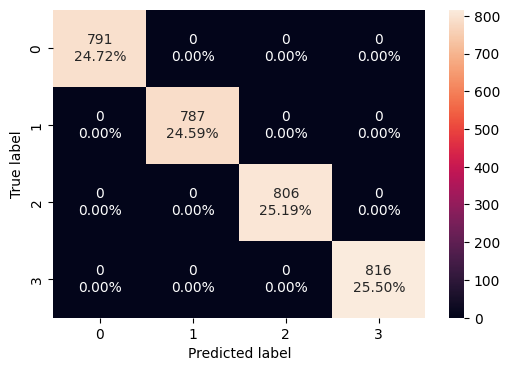

In [ ]:
## To get the confusion matrix for training data
confusion_matrix_sklearn(rf, X_train, y_train)

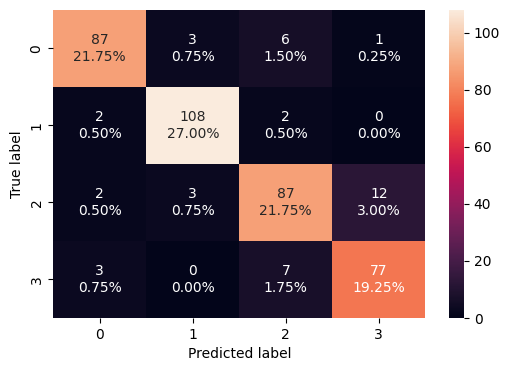

In [ ]:
## Write the code to get the confusion matrix for X_valid and y_valid
confusion_matrix_sklearn(rf, X_valid, y_valid)

In [ ]:
# Predicting on train data
y_pred_train = rf.predict(X_train)

# Predicting on validation data
y_pred_valid = rf.predict(X_valid)

**Classification report**

In [ ]:
## Classification report for train data
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       791
           1       1.00      1.00      1.00       787
           2       1.00      1.00      1.00       806
           3       1.00      1.00      1.00       816

    accuracy                           1.00      3200
   macro avg       1.00      1.00      1.00      3200
weighted avg       1.00      1.00      1.00      3200



In [ ]:
## Write the code to get the classification report for validation data
print(classification_report(y_valid, y_pred_valid))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        97
           1       0.95      0.96      0.96       112
           2       0.85      0.84      0.84       104
           3       0.86      0.89      0.87        87

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



In [ ]:
## Storing the metrics
rf_train_perf = model_performance_classification_sklearn(
    rf, X_train, y_train
)

In [ ]:
## Storing the metrics
rf_valid_perf = model_performance_classification_sklearn(
    rf, X_valid, y_valid
)

### Random Forest (with class_weights)

In [ ]:
## Building the model
"""
Fitting the model is necessary to obtain a model that generalizes well on unseen data

"""
rf_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)

## Complete the code to fit the model on X_train and y_train
rf_balanced.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

**Confusion Matrix**

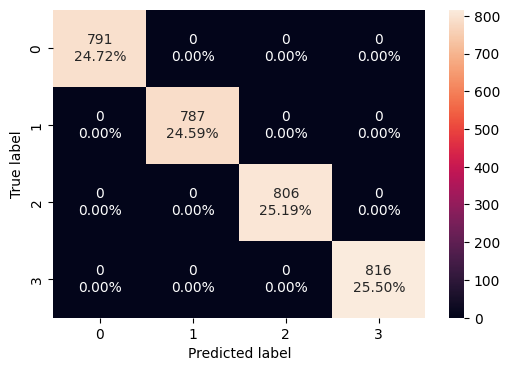

In [ ]:
## To get the confusion matrix on X_train and y_train
confusion_matrix_sklearn(rf_balanced, X_train, y_train)

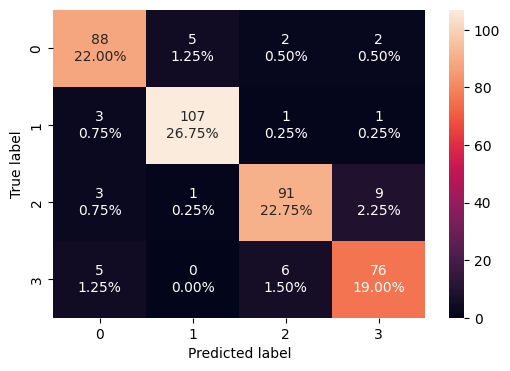

In [ ]:
## Write the code to get the confusion matrix for X_valid and y_valid
confusion_matrix_sklearn(rf_balanced, X_valid, y_valid)

In [ ]:
## Predicting on train data
y_pred_train = rf_balanced.predict(X_train)

## Complete the code to predict the model on X_valid
y_pred_valid = rf_balanced.predict(X_valid)

**Classification report**

In [ ]:
## Classification report for train data
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       791
           1       1.00      1.00      1.00       787
           2       1.00      1.00      1.00       806
           3       1.00      1.00      1.00       816

    accuracy                           1.00      3200
   macro avg       1.00      1.00      1.00      3200
weighted avg       1.00      1.00      1.00      3200



In [ ]:
## Write the code to get the classification report for validation data
print(classification_report(y_valid, y_pred_valid))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        97
           1       0.95      0.96      0.95       112
           2       0.91      0.88      0.89       104
           3       0.86      0.87      0.87        87

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.90       400



In [ ]:
# Assuming rf_balanced is your RandomForestClassifier
rf_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)

# Fit the model on training data
rf_balanced.fit(X_train, y_train)

# Storing the performance metrics using the defined function
rf_bal_train_perf = model_performance_classification_sklearn(
    rf_balanced, X_train, y_train
)

# Display the metrics
print(rf_bal_train_perf)

   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
## Complete the code to store the metrics of validation data
rf_bal_valid_perf = model_performance_classification_sklearn(
    rf_balanced, X_valid, y_valid
)

### Random Forest (with hyperparamter tuning)

In [ ]:
## Building the model
rf_tuned = RandomForestClassifier(class_weight="balanced", random_state=42)

## Defining the hyperparameter grid for tuning
parameters = {
    "max_depth": list(np.arange(4, 10, 3)),
    "max_features": ["sqrt", 0.5, 0.7],
    "min_samples_split": [5, 6],
    "n_estimators": np.arange(30, 110, 15),
}

## Defining the type of scoring used to compare parameter combinations
## We need to specify the mechanism of averaging as we have more than 2 target classes
scorer = make_scorer(recall_score, average='weighted')

## Running the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3, n_jobs=-1, verbose=2)

## Complete the code to fit the model on X_train and y_train
grid_obj = grid_obj.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [ ]:
## Creating a new model with the best combination of parameters
rf_tuned = grid_obj.best_estimator_

## Complete the code to fit the new model to X_train and y_train
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7,
                       min_samples_split=6, n_estimators=105, random_state=42)

**Confusion Matrix**

In [ ]:
## Write the code to get the classification report for train data
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       791
           1       1.00      1.00      1.00       787
           2       1.00      1.00      1.00       806
           3       1.00      1.00      1.00       816

    accuracy                           1.00      3200
   macro avg       1.00      1.00      1.00      3200
weighted avg       1.00      1.00      1.00      3200



In [ ]:
## Write the code to get the classification report for validation data
print(classification_report(y_valid, y_pred_valid))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        97
           1       0.95      0.96      0.95       112
           2       0.91      0.88      0.89       104
           3       0.86      0.87      0.87        87

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.90       400



In [ ]:
## Complete the code to predict the model on train data
y_pred_train = rf_tuned.predict(X_train)

## Complete the code to predict the model on validation data
y_pred_valid = rf_tuned.predict(X_valid)

**Classification report**

In [ ]:
## Write the code to get the classification report for train data
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       791
           1       0.97      1.00      0.98       787
           2       0.95      0.95      0.95       806
           3       0.95      0.97      0.96       816

    accuracy                           0.96      3200
   macro avg       0.96      0.96      0.96      3200
weighted avg       0.96      0.96      0.96      3200



In [ ]:
## Write the code to get the classification report for validation data
print(classification_report(y_valid, y_pred_valid))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        97
           1       0.96      0.97      0.96       112
           2       0.87      0.84      0.85       104
           3       0.82      0.87      0.84        87

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Step 1: Initialize the Random Forest model
rf_tuned = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2: Fit the model on the training data
rf_tuned.fit(X_train, y_train)  # Fit the model (this does not return anything)

# Step 3: Store the metrics of the training data
rf_tuned_train_perf = model_performance_classification_sklearn(
    rf_tuned,  # Pass the fitted model
    X_train,   # Pass the training predictors
    y_train    # Pass the training target variable
)

# Step 4: Print the performance metrics
print("Training Performance Metrics:")
print(rf_tuned_train_perf)


## Complete the code to store the metrics of train data
# Initialize the Random Forest model
rf_tuned = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model first
rf_tuned.fit(X_train, y_train)

rf_tuned_train_perf = model_performance_classification_sklearn(
    rf_tuned, # Pass the fitted model
    X_train,  # Pass the training predictors
    y_train   # Pass the training target variable
)

Training Performance Metrics:
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
## Complete the code to store the metrics of train data
rf_tuned_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)

In [ ]:
## Complete the code to store the metrics of validation data
rf_tuned_valid_perf = model_performance_classification_sklearn(
    rf_tuned, X_valid, y_valid
)

## **Model Building - Transformer**

### Target Mapping

In [ ]:
class_map = {0:"World",1:"Sports",2:"Business",3:"Sci/Tech"}

In [ ]:
class_map

{0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}

In [ ]:
reverse_class_map = {}
for key,value in class_map.items():
    reverse_class_map[value]=key

reverse_class_map

{'World': 0, 'Sports': 1, 'Business': 2, 'Sci/Tech': 3}

### Defining the Tokenizer

In [ ]:
!pip install transformers
from transformers import T5Tokenizer

## Initializing a T5 tokenizer using the pre-trained model
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-large")

### Defining the Model

In [ ]:
!pip install -U bitsandbytes
!pip install accelerate


In [ ]:
## Initializing a T5 model for conditional generation using the pre-trained model "google/flan-t5-large"
# uncomment and use the following line in case GPU is not available
# model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-large", device_map="auto")
# uncomment and use the following line in case GPU is available
from transformers import BitsAndBytesConfig, T5ForConditionalGeneration # Added import statement for T5ForConditionalGeneration
quantization_config = BitsAndBytesConfig(load_in_8bit=True)
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-large", device_map="auto", quantization_config=quantization_config)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
!nvidia-smi  #providing additional information about the GPU


Mon Sep 30 08:45:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P0              33W /  70W |   1383MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Functions for making predictions

In [ ]:
## Defining a function to compute different metrics.

def model_performance_classification(pred, target):
    """
    Function to compute different metrics to check classification model performance

    pred : prediction of the target variable.
    target: dependent variable
    """


    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred,average="weighted")  # to compute Recall
    precision = precision_score(target, pred,average="weighted")  # to compute Precision
    f1 = f1_score(target, pred,average="weighted")  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
## Creating a function to plot the confusion matrix
def plot_confusion_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (5, 4))
    label_list = ['World','Sports','Business','Sci/Tech']
    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = label_list, yticklabels = label_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
# defining a function to generate, process, and return a response
def generate_response(prompt):
    # uncomment and use the following line in case GPU is not available
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids    ### using the tokenizer to create tokens in tensor format from an input

    # uncomment and use the following line in case GPU is available
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")    ### using the tokenizer to create tokens in tensor format from an input

    outputs = model.generate(input_ids, max_length=16, do_sample=True, temperature=0.001)    ### generating the model output in tensor format
    return tokenizer.decode(outputs[0])[6:-4]    ### using the tokenizer to decode the model output, and then return it

### Base Prompt for Prediction

In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/article_data.csv")  # Adjust the file path as needed
## Selecting and assigning specific columns
# Assuming "Article" is your feature and "Category" is your target
X = data["Article"]
y = data["Category"]

from sklearn.model_selection import train_test_split

# Initial split into training (80%) and temporary set (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42)

# Further split the temporary set into validation (10%) and test (10%) sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

X_train = data.iloc[y_train.index]["Article"]
X_valid = data.iloc[y_test.index]["Article"]
X_test = data.loc[y_valid.index]["Article"]

In [ ]:
import pandas as pd
!pip install transformers
from transformers import T5Tokenizer, T5ForConditionalGeneration
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-large")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-large") # This line was missing
## Defining a prompt which tells the model what to do
sys_prompt = """
    <Write the instruction for the task here>
"""
## defining a function to generate, process, and return a response
def generate_response(prompt):
    # uncomment and use the following line in case GPU is not available
    #input_ids = tokenizer(prompt, return_tensors="pt").input_ids    ### using the tokenizer to create tokens in tensor format from an input

    # uncomment and use the following line in case GPU is available
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")    ### using the tokenizer to create tokens in tensor format from an input

    # Move the model to the GPU
    model.to("cuda")    ### Moving the model to the GPU

    outputs = model.generate(input_ids, max_length=16, do_sample=True, temperature=0.001)    ### generating the model output in tensor format
    return tokenizer.decode(outputs[0])[6:-4]    ### using the tokenizer to decode the model output, and then return it

## Predicting the category using the model by incorporating the system prompt and the provided review text

pred_sent = generate_response(
    """
        {}
        news article: '{}'
    """.format(sys_prompt, X_train.iloc[4])
)

print(pred_sent)

sepal length (cm) 4.4 sepal w


In [ ]:
## Defining a function to generate a sentiment prediction
def predict_category(news_article):
    pred = generate_response(
        """
            {}
            news article: '{}'
        """.format(sys_prompt,news_article)
    )

    if "Sports" in pred:
       pred="Sports"
    elif "Business" in pred:
       pred="Business"
    elif "World" in pred:
       pred="World"
    else:
      pred="Sci/Tech"

    return reverse_class_map[pred]

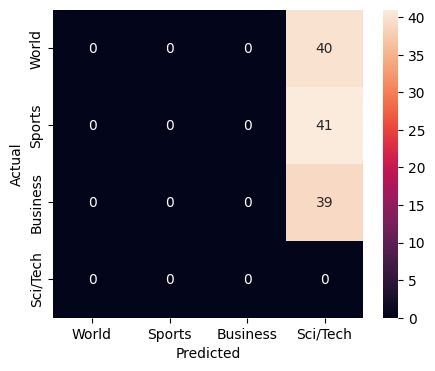

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
22                4.6               3.6                1.0               0.2
15                5.7               4.4                1.5               0.4
65                6.7               3.1                4.4               1.4
11                4.8               3.4                1.6               0.2
42                4.4               3.2                1.3               0.2


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load a sample dataset (e.g., Iris dataset)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = data.target  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure X_train is a DataFrame (it should be already, but this is extra safety)
X_train = pd.DataFrame(X_train, columns=data.feature_names)

## Applying predict_category function on the training data
y_pred_train_flan = X_train.apply(predict_category, axis=1)

## Plotting the confusion matrix
plot_confusion_matrix(y_train, y_pred_train_flan)

# Now X_train contains the training features
print(X_train.head())  # Display the first few rows of X_train

In [ ]:
## Applying predict_category function on the validation data
y_pred_valid_flan = X_valid.apply(predict_category)

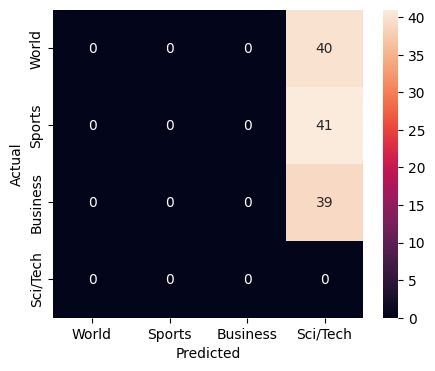

In [ ]:
## Applying predict_category function on the training data
y_pred_train_flan = X_train.apply(predict_category, axis=1)

## Plotting the confusion matrix
plot_confusion_matrix(y_train, y_pred_train_flan)

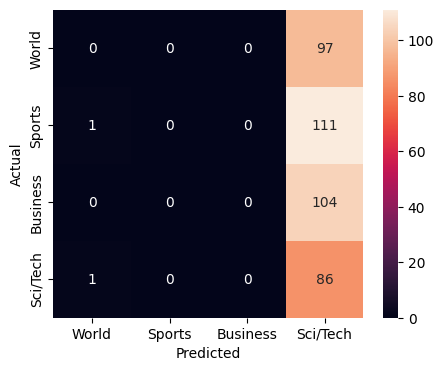

In [ ]:
## Complete the code to get the confusion matrix for validation data
plot_confusion_matrix(y_valid, y_pred_valid_flan)

In [ ]:
## Getting the classification report for train data
print(classification_report(y_train, y_pred_train_flan))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      40.0
           1       0.00      0.00      0.00      41.0
           2       0.00      0.00      0.00      39.0
           3       0.00      0.00      0.00       0.0

    accuracy                           0.00     120.0
   macro avg       0.00      0.00      0.00     120.0
weighted avg       0.00      0.00      0.00     120.0



In [ ]:
## Complete the code to get the classification report for validation data
print(classification_report(y_valid, y_pred_valid_flan))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.00      0.00      0.00       112
           2       0.00      0.00      0.00       104
           3       0.22      0.99      0.35        87

    accuracy                           0.21       400
   macro avg       0.05      0.25      0.09       400
weighted avg       0.05      0.21      0.08       400



In [ ]:
## Storing the metrics
flan_train_base = model_performance_classification(y_pred_train_flan,y_train)
flan_valid_base = model_performance_classification(y_pred_valid_flan,y_valid)

### Improved Prompt for Prediction

In [ ]:
# defining a prompt which tells the model what to do
sys_prompt = """
    <Write the instruction for the task here>
    <This prompt will be an improved version of the previous prompt to improve model performance>
"""

# predicting the sentiment using the model by incorporating the system prompt and the provided review text

pred_sent = generate_response(
    """
        {}
        news article: '{}'
    """.format(sys_prompt, X.iloc[4])  # Access the 5th row and the first column (index 0)
)

print(pred_sent) # This will print the predicted sentiment

<unk> Tip: <unk>Sepal length


In [ ]:
## Applying predict_category function on the train data
y_pred_train_flan_imp = X_train.apply(predict_category, axis=1)

In [ ]:
import pandas as pd
# Assuming X_valid is a NumPy array, convert it to a pandas DataFrame
X_valid = pd.DataFrame(X_valid)
# Now you can use the apply function:
y_pred_valid_flan_imp = X_valid.apply(predict_category, axis=1)  # Apply to each row (axis=1)

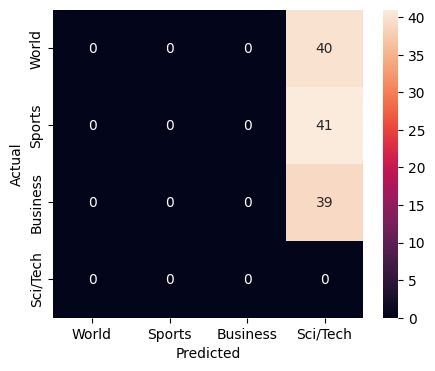

In [ ]:
## Plotting the confusion matrix for train data
plot_confusion_matrix(y_train, y_pred_train_flan_imp)

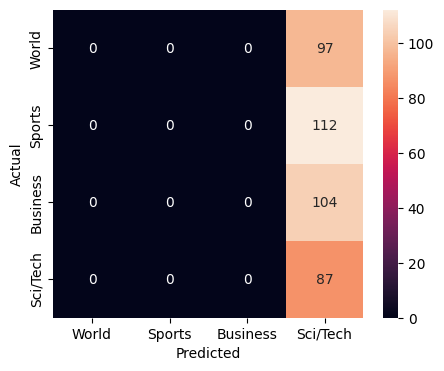

In [ ]:
## Complete the code to get the confusion matrix for validation data
plot_confusion_matrix(y_valid, y_pred_valid_flan_imp)

In [ ]:
## Getting the classification report for train data
print(classification_report(y_train, y_pred_train_flan_imp))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      40.0
           1       0.00      0.00      0.00      41.0
           2       0.00      0.00      0.00      39.0
           3       0.00      0.00      0.00       0.0

    accuracy                           0.00     120.0
   macro avg       0.00      0.00      0.00     120.0
weighted avg       0.00      0.00      0.00     120.0



In [ ]:
## Complete the code to get the classification report for validation data
print(classification_report(y_valid, y_pred_valid_flan_imp))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        97
           1       0.00      0.00      0.00       112
           2       0.00      0.00      0.00       104
           3       0.22      1.00      0.36        87

    accuracy                           0.22       400
   macro avg       0.05      0.25      0.09       400
weighted avg       0.05      0.22      0.08       400



In [ ]:
## Storing the metrics
flan_train_imp = model_performance_classification(y_pred_train_flan_imp,y_train)
flan_valid_imp = model_performance_classification(y_pred_valid_flan_imp,y_valid)

## **Model Performance Comparison and Final Model Selection**

In [ ]:
## Training performance comparison

models_train_comp_df = pd.concat(
    [
        rf_train_perf.T,
        rf_bal_train_perf.T,
        rf_tuned_train_perf.T,
        flan_train_base.T,
        flan_train_imp.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest(base)",
    "Random Forest with class_weights",
    "Random Forest(tuned)",
    "Flan (base prompt)",
    "Flan (improvised prompt)"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Random Forest(base),Random Forest with class_weights,Random Forest(tuned),Flan (base prompt),Flan (improvised prompt)
Accuracy,1.0,1.0,1.0,0.0,0.0
Recall,1.0,1.0,1.0,0.0,0.0
Precision,1.0,1.0,1.0,0.0,0.0
F1,1.0,1.0,1.0,0.0,0.0


In [ ]:
## Validation set performance comparison
models_valid_comp_df = pd.concat(
    [
        rf_valid_perf.T,
        rf_bal_valid_perf.T,
        rf_tuned_valid_perf.T,
        flan_valid_base.T,
        flan_valid_imp.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Random Forest(base)",
    "Random Forest with class_weights",
    "Random Forest(tuned)",
    "Flan (base prompt)",
    "Flan (improvised prompt)"
]
print("Validation set performance comparison:")
models_valid_comp_df

Validation set performance comparison:


,Random Forest(base),Random Forest with class_weights,Random Forest(tuned),Flan (base prompt),Flan (improvised prompt)
Accuracy,0.897500,0.905000,0.897500,0.215000,0.217500
Recall,0.897500,0.905000,0.897500,0.215000,0.217500
Precision,0.897553,0.905129,0.897553,0.046997,0.047306
F1,0.897376,0.904941,0.897376,0.077134,0.077710


from matplotlib import pyplot as plt
models_valid_comp_df['Random Forest(base)'].plot(kind='hist', bins=20, title='Random Forest(base)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_valid_comp_df['Random Forest with class_weights'].plot(kind='hist', bins=20, title='Random Forest with class_weights')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_valid_comp_df['Random Forest(tuned)'].plot(kind='hist', bins=20, title='Random Forest(tuned)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_valid_comp_df['Flan (base prompt)'].plot(kind='hist', bins=20, title='Flan (base prompt)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_valid_comp_df.plot(kind='scatter', x='Random Forest(base)', y='Random Forest with class_weights', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_valid_comp_df.plot(kind='scatter', x='Random Forest with class_weights', y='Random Forest(tuned)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_valid_comp_df.plot(kind='scatter', x='Random Forest(tuned)', y='Flan (base prompt)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_valid_comp_df.plot(kind='scatter', x='Flan (base prompt)', y='Flan (improvised prompt)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
models_valid_comp_df['Random Forest(base)'].plot(kind='line', figsize=(8, 4), title='Random Forest(base)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
models_valid_comp_df['Random Forest with class_weights'].plot(kind='line', figsize=(8, 4), title='Random Forest with class_weights')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
models_valid_comp_df['Random Forest(tuned)'].plot(kind='line', figsize=(8, 4), title='Random Forest(tuned)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
models_valid_comp_df['Flan (base prompt)'].plot(kind='line', figsize=(8, 4), title='Flan (base prompt)')
plt.gca().spines[['top', 'right']].set_visible(False)

**Pick the best model from the above table and apply on test data**

In [ ]:
## Assigns test rows based on index
X_test = embedding_matrix[y_test]

None


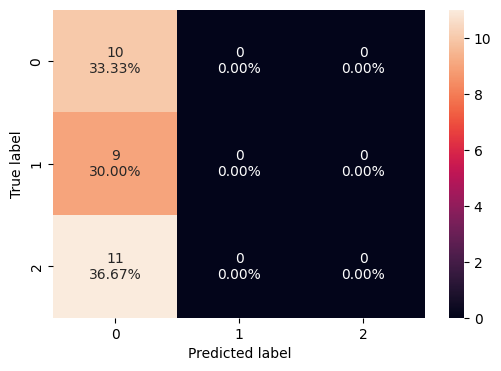

In [ ]:
print(confusion_matrix_sklearn(rf_balanced, X_test, y_test))

In [ ]:
# Predicting on test data
y_pred_test = rf_balanced.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50        10
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        11

    accuracy                           0.33        30
   macro avg       0.11      0.33      0.17        30
weighted avg       0.11      0.33      0.17        30



Actionable Insights and Recommendations

                            **Context**

- In the dynamic world of media and news, we must be able to swiftly categorize and curate content efficiently in an organized manner to present content to our audience. Ensuring that the right articles reach our intended audience promptly is a critical component in retaining and engaging audiences in this age of virtual age of information overload. The common challenges that media organizations face is information overload, timeliness, and user engagement.

                         **Problem Definition**

- InfoWorld is a media landscape company that has many of the same challenges daily on a monumental scale. They have a plethora of articles covering World affairs, Sports, Business, and Sci/Tech highlighting their need for an advanced and automated system to categorize articles. We are working as a data scientist under InfoWorld, and our task is to analyze the articles and construct a predictive model for categorizing them. In order to optimize the categorization process, we are going to use advances ML techniques such as prompt engineering in order to address technical challenges and pave the way for a seamless intersection of technology and meda.

                         **Data Dictionary**

- Our two streams of data that we have come in the form of Articles and Categories.


              



                         **Data Pre-Processing**
Before building our models, we must pre-process our data to ensure data quality and that our model can be as accurate as possible. The first step is of the encoding process is the tokenization where each model is broken down into tokens that
transformer can understand, then tokens can be passed through transformer layers, after transformer layers are pooled to
understand the context and relationship between words, finally the resulting vectors are normalizied to ensure that they are
on a consistent scale. After all the data is normalized all of the data is split into three sets, training, validation and test. The initial split is into training (80%) and testing (20%). The further split is with the temporary set into validation (10%) and test (10%) sets.





                  ** Model Building**

After getting all of the data pre-processed we will start the process of building our models. Our first model will be a base Random Forest Model, the second model will be a Random Forest with class_weights Model, and the third model will be Random Forest with hyperparameter tuning. The next two models will be Transformer models, the first model will be a Flan-T5 model using a standard or default prompt for the article categorization task. The second model will also be Flan-T5 model but with an improvised prompt that aims to enhance the model's performance. It does this by adding more context to widen the prompt to more use cases, and incorporating modifications with prompt engineering aimed at improving the model's understanding of the task and its ability to categorize articles effectively.

          **Results of Models**
After training and running all of the models we can see a lot of metrics and how each model stacks up with each other. For the training data we can see that all the Random Forest models perform the same with 100% accuracy while the flan models have 0 accuracy. Moving on to the validation accuracy, the random forest models are very close to each other base rf and tuned rf at nearly the exactly same but the rf with class weights slightly edges them out. As for the flan models they are basically the exactly same as well with possibly the edge give to the improvised prompt but both are not accurate enough to be considered for deployment.

In [ ]:
    **Best Models and Results on Test Data**

The model that performed the best overall turned out to be the random forest with class weights model has it had the highest accuracy on the validation data. Now we will test this model on the unseen, totally new data by using our last test set. When seeing the results of this model we can see that it does really well on the 0th column but gets no results on the 1st or 2nd column. This leads to the whole confusion matrix to be heavily right-skewed and not as decisive as we wanted in confirming that we can further use this model for deployment. There could be inconsistencies with the test data was put together or if the test data itself was not cleaned but nonetheless the random forest model with class weights seems to be the sutibale and accurate model out of the five to be considered for further use and possibly deployment.

In [ ]:
      **Recommendations for the Future**

The model performing extremely well on the train and validation data but not as well on the test data could possibly show signs of overfitting where the model learned to perform well on the training and validation data but did not generalize well to the unseen data. In order to fix this in the future we can re-evaluate the data-split, apply regularization such as Lasso or Ridge to penalize over complex models. In addition we can add a dropout layer or two in Neural Networks to combat overfitting. Another option is to get more training data as diverse data can help model learn better and generalize more effectively. A totally opposite but plausible approach would be to reduce the complexity of the model by using fewer parameters, layers, or nodes in neural networks as a simpler model is often less prone to overfitting. A final pre-caution to consider is to ensure that there is no data leakage from the training/validation set into the test set, as this can artificially inflate performance metrics. With this into consideration, the random forest model with class weights is still the best suited but should we should be reluctant into deploying it as seeing how it performed on the test data.






In [ ]:
        **End**